In [ ]:
import math
import numpy as np
import pandas as pd
from random import choice
def simulate_growth_curves(params, breed="AC", gender="Females", n_individuals=100,
                           output_file="AC_Females.csv", scale_min=None, scale_max=None, farm="Farm"):
    """
    Simulates growth curves for a specific breed and gender.

    Parameters:
        params (list): List with [b0, b1, b2] parameters for the growth model.
        breed (str): Name of the breed.
        gender (str): Gender of the animal.
        n_individuals (int): Number of animals to simulate.
        output_file (str): Name of the output CSV file.
        scale_min (list): List of standard deviations for days > 800.
        scale_max (list): List of standard deviations for days <= 800.
        farm (str): Name of the farm.
    Returns:
        pd.DataFrame: DataFrame with the simulated data.
    """
    time_days = range(365, 2800, 30)
    data = []

    b0, b1, b2 = params

    for i in range(1, n_individuals + 1):
        for t in time_days:
            noise = np.random.normal(scale=choice(scale_min if t > 800 else scale_max))
            weight = b0 * (1 - b1 * math.exp(-b2 * t)) + noise
            data.append([t, weight, breed, gender, f"{breed}_{gender[0]}_{i}", farm])

    df = pd.DataFrame(data, columns=['day', 'weight', 'breed', 'gender', 'animal_id', 'farm'])
    df.to_csv('Data/'+output_file, index=False)
    return df

AC_H = [478,0.920,0.00159]
BAC_H = [451,0.918,0.00174]
BC_H = [547,0.926,0.00119]
CAC_H = [504,0.921,0.00144]
CC_H = [492,0.923,0.00154]
AC_M = [478,0.920,0.00159]
BAC_M = [451,0.918,0.00174]
BC_M = [547,0.926,0.00119]
CAC_M = [504,0.921,0.00144]
CC_M = [492,0.923,0.00154]

farm_settings = {
    "Farm1": {
        "scale_min": [1, 1.5, 2, 2.5],
        "scale_max": [3, 3.5, 4]
    },

    "Farm2": {
        "scale_min": [2.5, 3, 3.5],
        "scale_max": [4, 5, 6]
    },

    "Farm3": {
        "scale_min": [1, 3, 5],
        "scale_max": [3, 6, 9]
    },

    "Farm4": {
        "scale_min": [4.5, 5, 6],
        "scale_max": [6, 7, 8, 9]
    }
}

for farm_name, settings in farm_settings.items():
    df = simulate_growth_curves(
        params=AC_H,
        breed="AC",
        gender="Females",
        output_file=f"{farm_name}.csv",
        scale_min=settings["scale_min"],
        scale_max=settings["scale_max"],
        farm=farm_name
    )

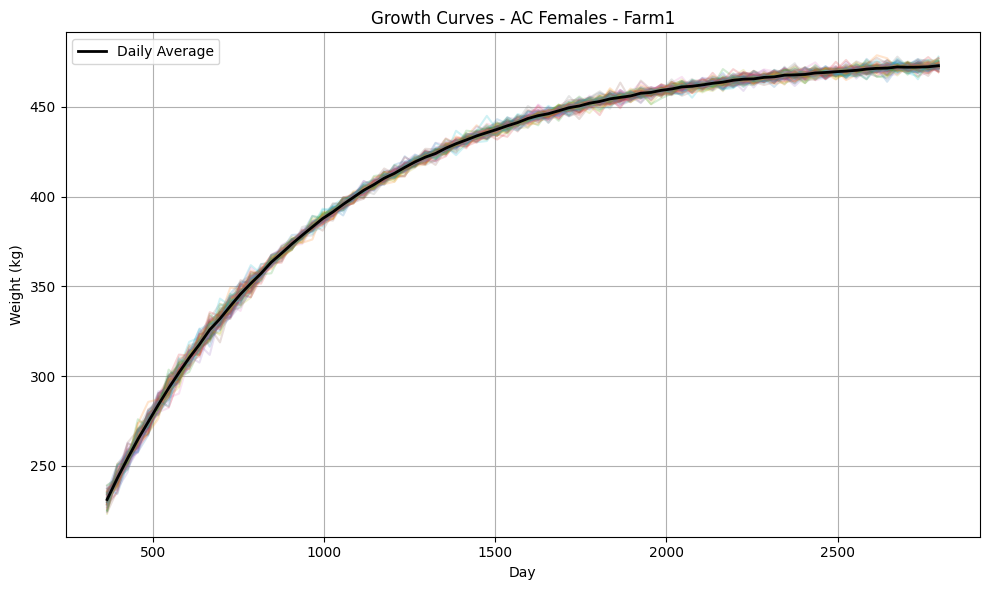

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Farm1.csv")
farm_name = df['farm'].unique()[0] if 'farm' in df.columns else "Unknown Farm"
plt.figure(figsize=(10, 6))
for animal_id, group in df.groupby('animal_id'):
    plt.plot(group['day'], group['weight'], alpha=0.2)
df_mean = df.groupby('day')['weight'].mean().reset_index()
plt.plot(df_mean['day'], df_mean['weight'], color='black', linewidth=2, label='Daily Average')
plt.title(f"Growth Curves - {df['breed'].iloc[0]} {df['gender'].iloc[0]} - {farm_name}")
plt.xlabel("Day")
plt.ylabel("Weight (kg)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

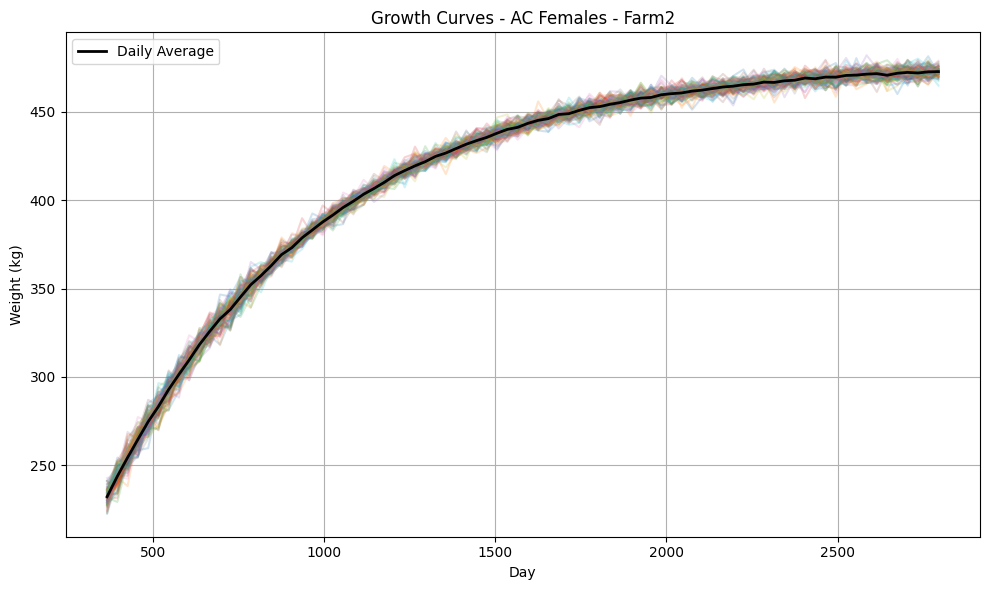

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Farm2.csv")
farm_name = df['farm'].unique()[0] if 'farm' in df.columns else "Unknown Farm"
plt.figure(figsize=(10, 6))
for animal_id, group in df.groupby('animal_id'):
    plt.plot(group['day'], group['weight'], alpha=0.2)
df_mean = df.groupby('day')['weight'].mean().reset_index()
plt.plot(df_mean['day'], df_mean['weight'], color='black', linewidth=2, label='Daily Average')
plt.title(f"Growth Curves - {df['breed'].iloc[0]} {df['gender'].iloc[0]} - {farm_name}")
plt.xlabel("Day")
plt.ylabel("Weight (kg)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()